# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Goal of the notebook

this notebook is used to predict the market data over 10 months and perform some feature selction 

# imports

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

# importing relevant 
from Functions import *

import importlib
imported_module = importlib.import_module("Functions")
importlib.reload(imported_module)


<module 'Functions' from '/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Functions.py'>

In [6]:
df_market = pd.read_csv('../Data/df_market.csv')
info_market = pd.read_csv('../Data/info_market.csv')
filtered_market = pd.read_csv('../Data/filtered_info_market.csv')

sales_agg1 = pd.read_csv('../Data/sales_agg1.csv')
sales_agg3 = pd.read_csv('../Data/sales_agg3.csv')
sales_agg4 = pd.read_csv('../Data/sales_agg4.csv')
sales_agg5 = pd.read_csv('../Data/sales_agg5.csv')
sales_agg6 = pd.read_csv('../Data/sales_agg6.csv')
sales_agg8 = pd.read_csv('../Data/sales_agg8.csv')
sales_agg9 = pd.read_csv('../Data/sales_agg9.csv')
sales_agg11 = pd.read_csv('../Data/sales_agg11.csv')
sales_agg12 = pd.read_csv('../Data/sales_agg12.csv')
sales_agg13 = pd.read_csv('../Data/sales_agg13.csv')
sales_agg14 = pd.read_csv('../Data/sales_agg14.csv')
sales_agg16 = pd.read_csv('../Data/sales_agg16.csv')
sales_agg20 = pd.read_csv('../Data/sales_agg20.csv')
sales_agg36 = pd.read_csv('../Data/sales_agg36.csv')

In [7]:
# extract a list of index codes that were find relevant in the preevious notebook
index_codes = filtered_market["Index Code"].tolist()
# only select the columns that were find relevant
df_market = df_market[["date"]+ index_codes]
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 219 non-null    object 
 1   MAB_ELE_PRO156       219 non-null    float64
 2   MAB_ELE_SHP156       219 non-null    float64
 3   MAB_ELE_SHP250       219 non-null    float64
 4   MAB_ELE_PRO392       219 non-null    float64
 5   MAB_ELE_SHP392       219 non-null    float64
 6   MAB_ELE_SHP826       201 non-null    float64
 7   MAB_ELE_SHP840       218 non-null    float64
 8   RohiBASEMET1000_org  219 non-null    float64
 9   RohiMETMIN1000_org   219 non-null    float64
 10  RohiNATGAS1000_org   219 non-null    float64
 11  RohCOPPER1000_org    219 non-null    float64
 12  WKLWEUR840_org       219 non-null    float64
 13  PRI27840_org         219 non-null    float64
 14  PRI27826_org         201 non-null    float64
 15  PRI27380_org         219 non-null    flo

**To change with the right predictor**

In [ ]:
from prophet import Prophet
def forecast_market_features_prophet(market_df, date_column='date', forecast_horizon=10, plot=True):
    """
    Forecasts each column (market feature) in the DataFrame for the next N months using Facebook Prophet.

    Parameters:
        market_df (pd.DataFrame): Market data with datetime column and multiple numeric columns.
        date_column (str): Name of the datetime column.
        forecast_horizon (int): Number of future periods (months) to forecast.
        plot (bool): Whether to plot the forecasts.

    Returns:
        dict: {feature_name: forecast_dataframe_with_future_values}
    """
    forecasts = {}
    market_df = market_df.copy()
    market_df[date_column] = pd.to_datetime(market_df[date_column])
    market_df = market_df.set_index(date_column).asfreq("MS")  # Monthly Start

    for feature in market_df.columns:
        series = market_df[feature].dropna()

        # Format data for Prophet
        df_prophet = pd.DataFrame({
            'ds': series.index,
            'y': series.values
        })

        model = Prophet(yearly_seasonality=True,
                        weekly_seasonality=False,
                        daily_seasonality=False,
                        seasonality_mode='multiplicative',
                        changepoint_prior_scale=0.5)  # Try 0.2, 0.5, 1.0
        model.fit(df_prophet)

        # Future dataframe
        future = model.make_future_dataframe(periods=forecast_horizon, freq='MS')
        forecast = model.predict(future)

        # Store only the forecasted part
        forecast_feature = forecast[['ds', 'yhat']].set_index('ds').iloc[-forecast_horizon:]
        forecasts[feature] = forecast_feature

        # Plot
        if plot:
            plt.figure(figsize=(10, 4))
            plt.plot(df_prophet['ds'], df_prophet['y'], label='History')
            plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
            plt.title(f"Forecast for '{feature}' using Prophet")
            plt.xlabel("Date")
            plt.ylabel("Value")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return forecasts


15:44:25 - cmdstanpy - INFO - Chain [1] start processing
15:44:25 - cmdstanpy - INFO - Chain [1] done processing


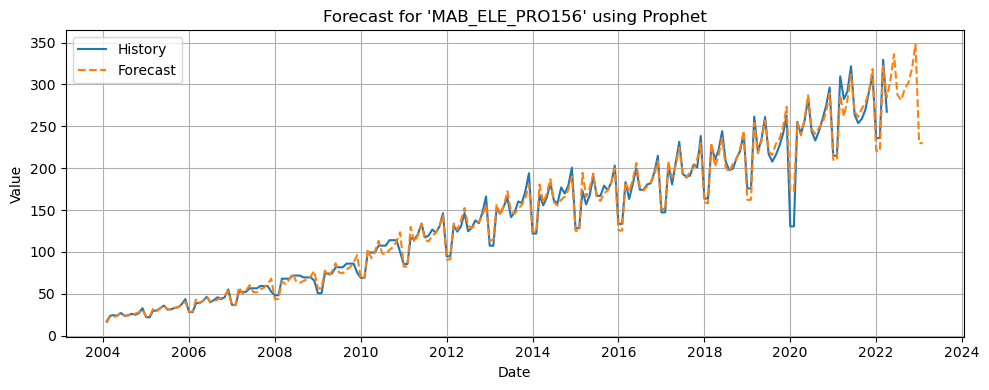

15:44:25 - cmdstanpy - INFO - Chain [1] start processing
15:44:25 - cmdstanpy - INFO - Chain [1] done processing


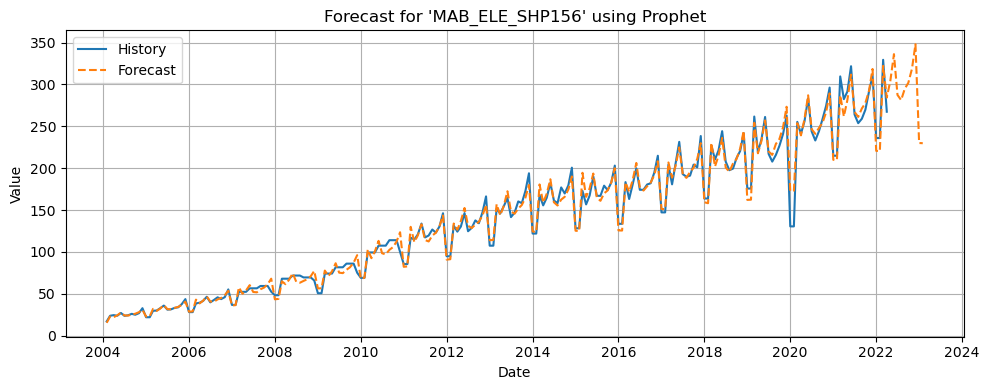

15:44:25 - cmdstanpy - INFO - Chain [1] start processing
15:44:25 - cmdstanpy - INFO - Chain [1] done processing


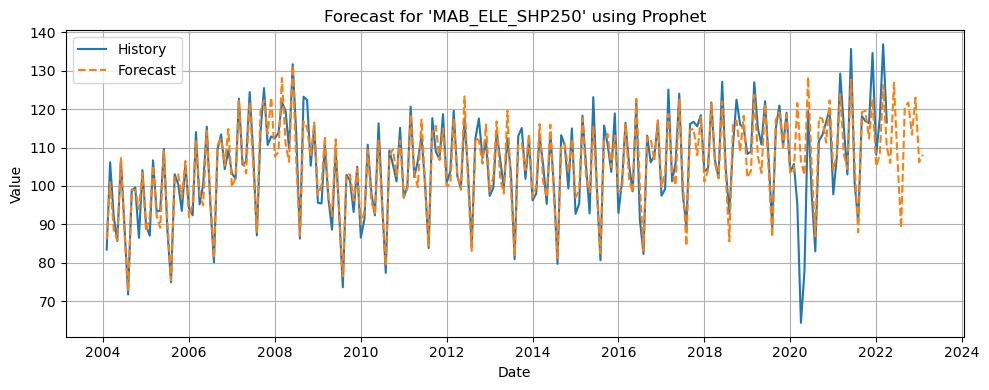

15:44:26 - cmdstanpy - INFO - Chain [1] start processing
15:44:26 - cmdstanpy - INFO - Chain [1] done processing


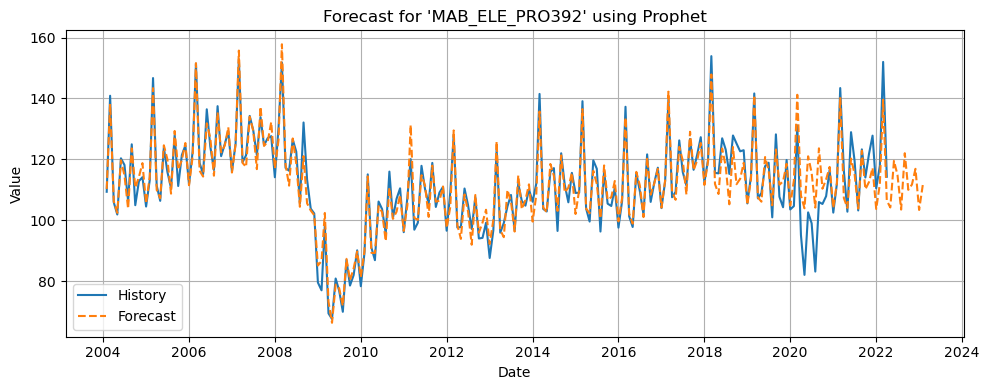

15:44:26 - cmdstanpy - INFO - Chain [1] start processing
15:44:26 - cmdstanpy - INFO - Chain [1] done processing


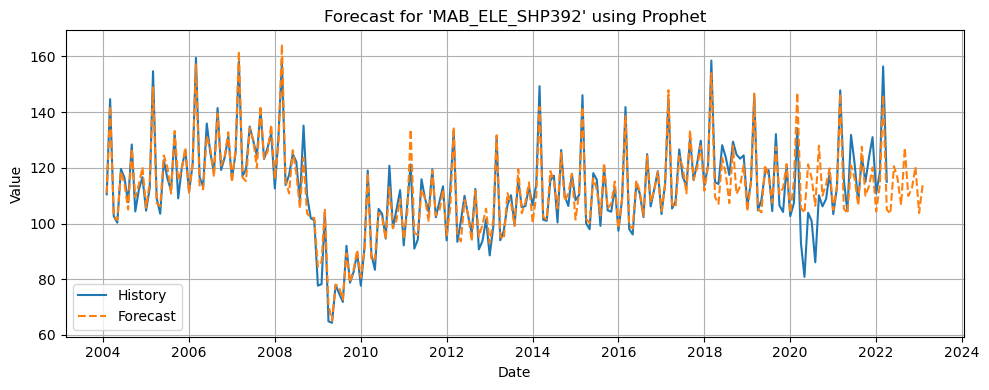

15:44:26 - cmdstanpy - INFO - Chain [1] start processing
15:44:26 - cmdstanpy - INFO - Chain [1] done processing


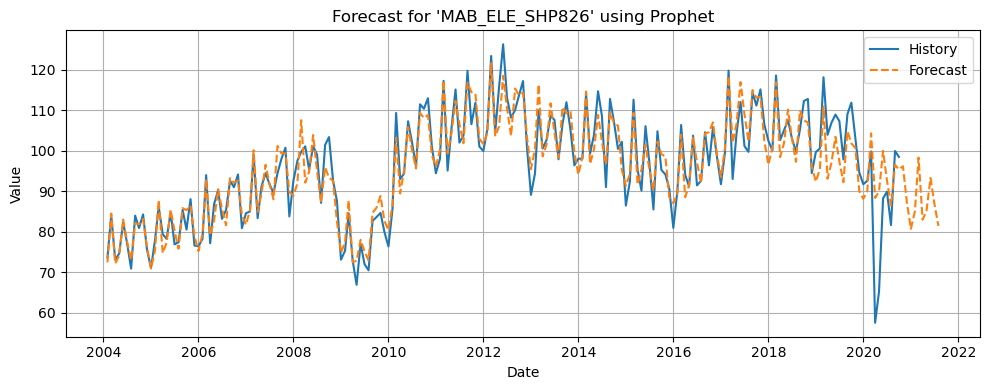

15:44:26 - cmdstanpy - INFO - Chain [1] start processing
15:44:26 - cmdstanpy - INFO - Chain [1] done processing


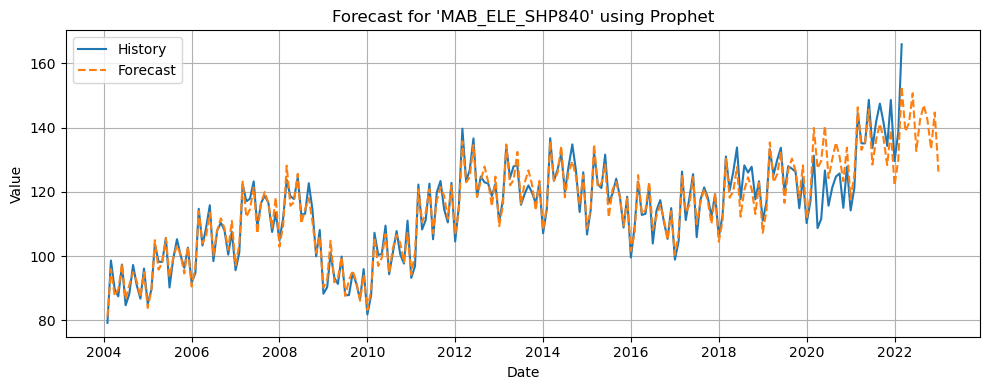

15:44:26 - cmdstanpy - INFO - Chain [1] start processing
15:44:27 - cmdstanpy - INFO - Chain [1] done processing


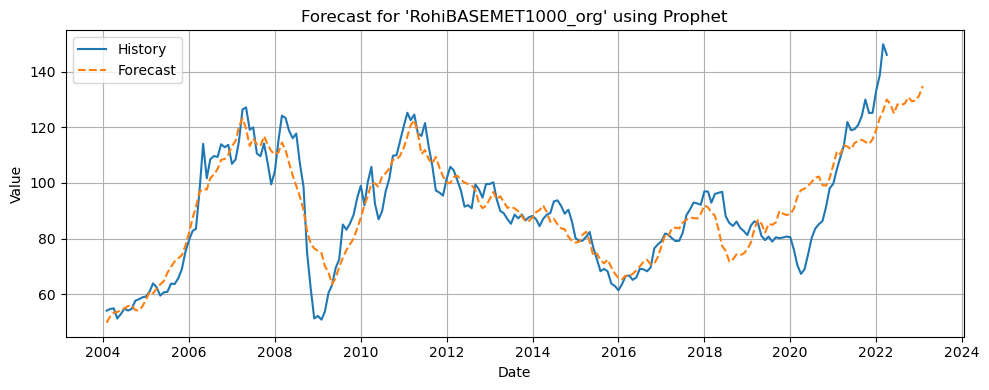

15:44:27 - cmdstanpy - INFO - Chain [1] start processing
15:44:27 - cmdstanpy - INFO - Chain [1] done processing


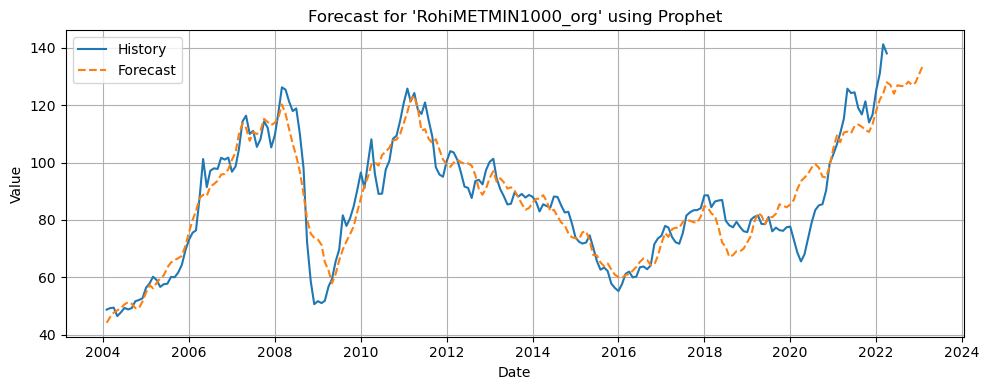

15:44:27 - cmdstanpy - INFO - Chain [1] start processing
15:44:27 - cmdstanpy - INFO - Chain [1] done processing


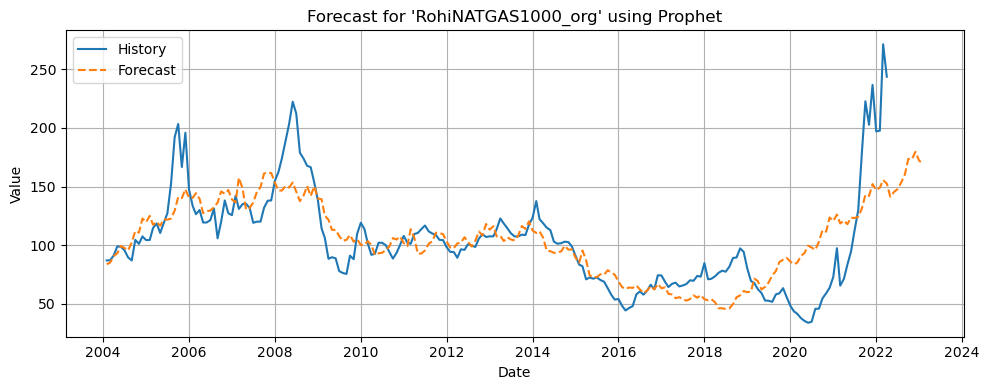

15:44:27 - cmdstanpy - INFO - Chain [1] start processing
15:44:27 - cmdstanpy - INFO - Chain [1] done processing


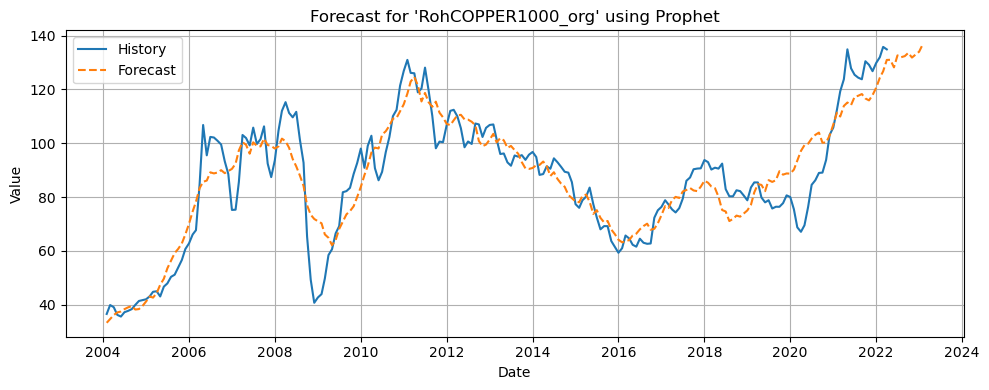

15:44:27 - cmdstanpy - INFO - Chain [1] start processing
15:44:27 - cmdstanpy - INFO - Chain [1] done processing


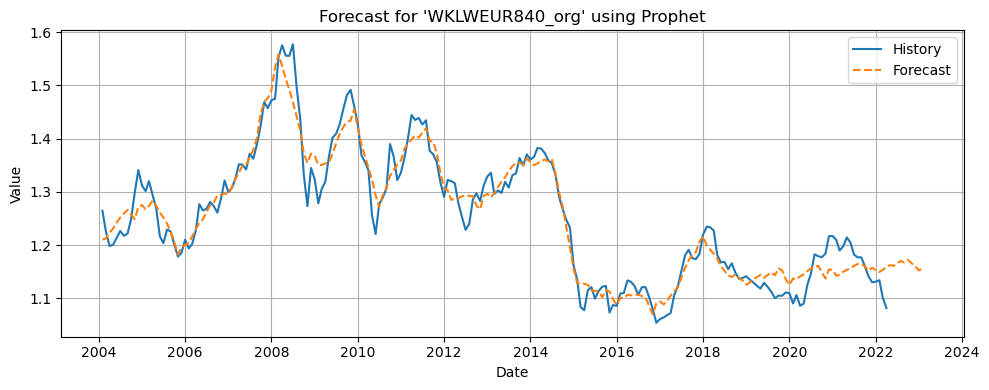

15:44:28 - cmdstanpy - INFO - Chain [1] start processing
15:44:28 - cmdstanpy - INFO - Chain [1] done processing


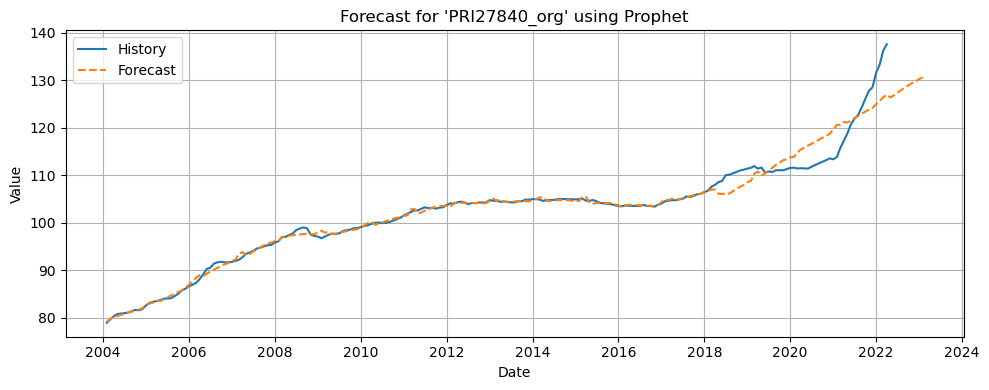

15:44:28 - cmdstanpy - INFO - Chain [1] start processing
15:44:28 - cmdstanpy - INFO - Chain [1] done processing


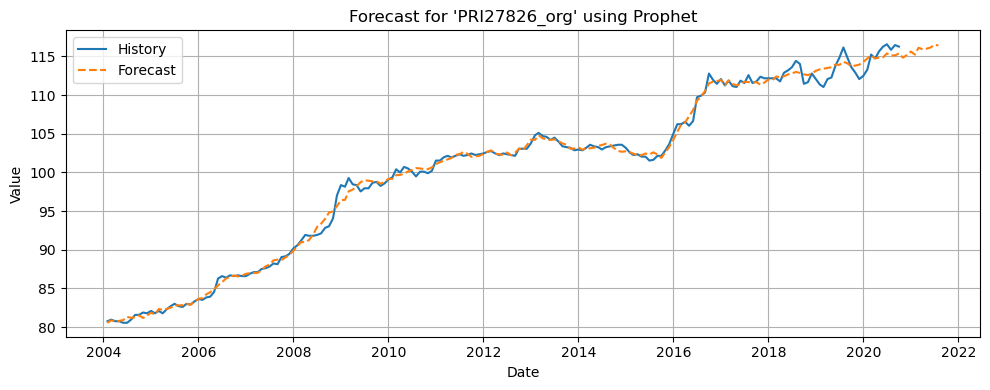

15:44:28 - cmdstanpy - INFO - Chain [1] start processing
15:44:28 - cmdstanpy - INFO - Chain [1] done processing


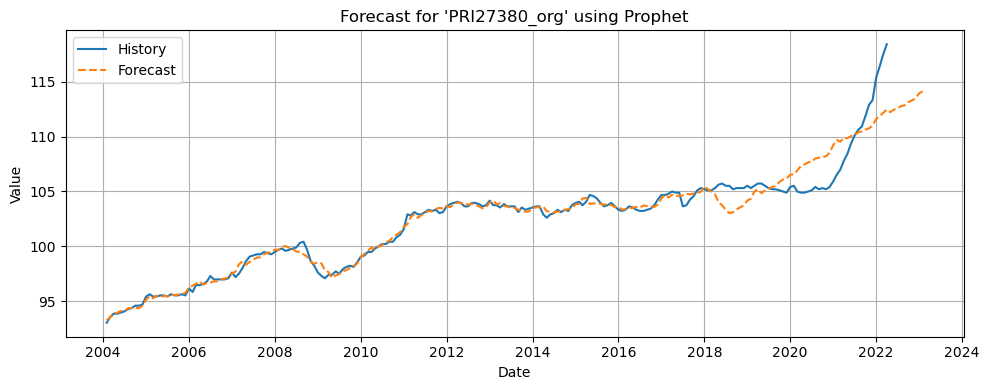

15:44:28 - cmdstanpy - INFO - Chain [1] start processing
15:44:28 - cmdstanpy - INFO - Chain [1] done processing


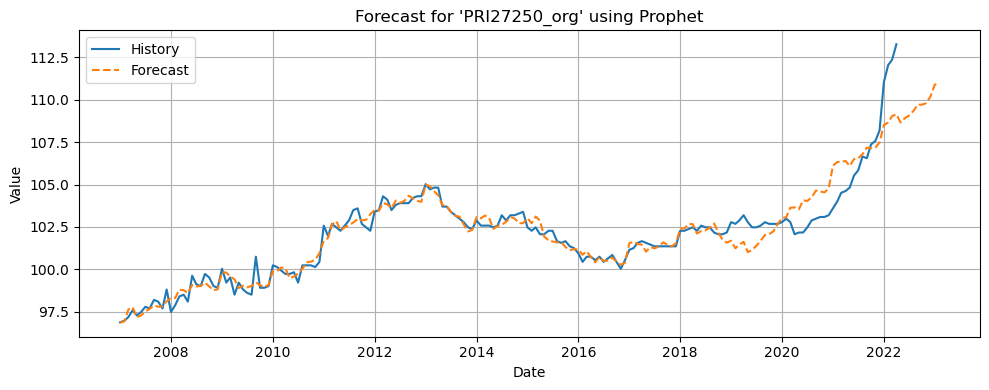

15:44:28 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing


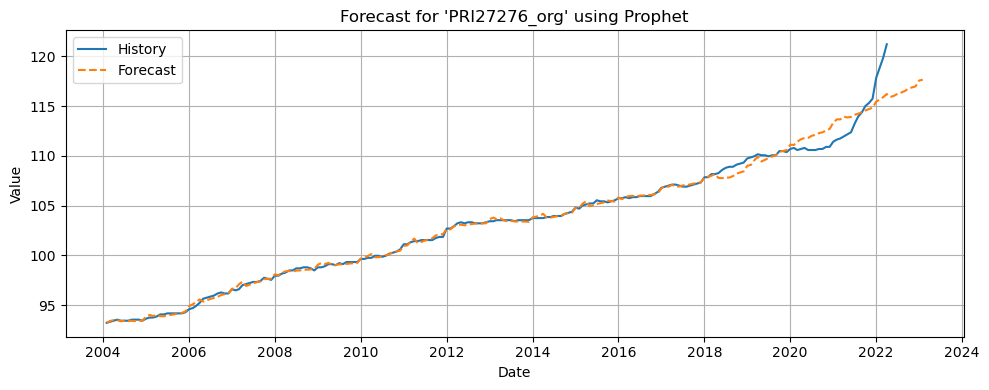

15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing


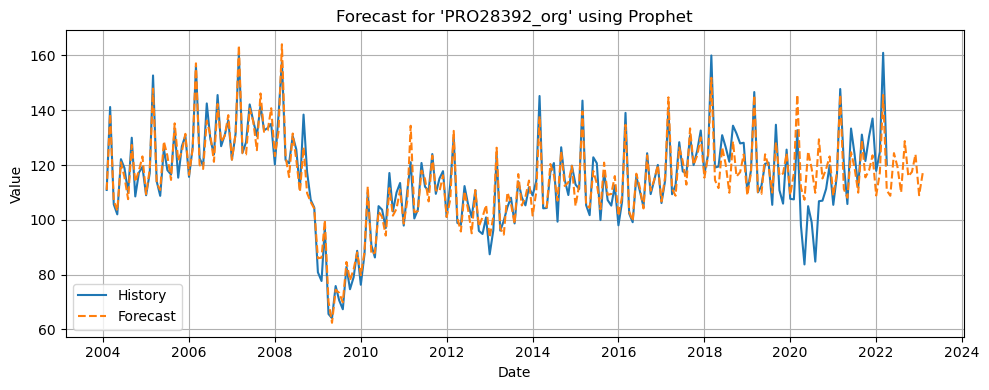

15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing


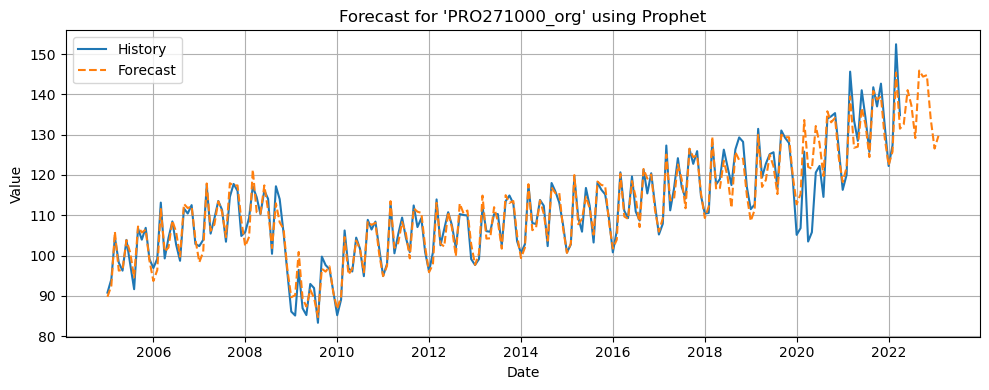

15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing


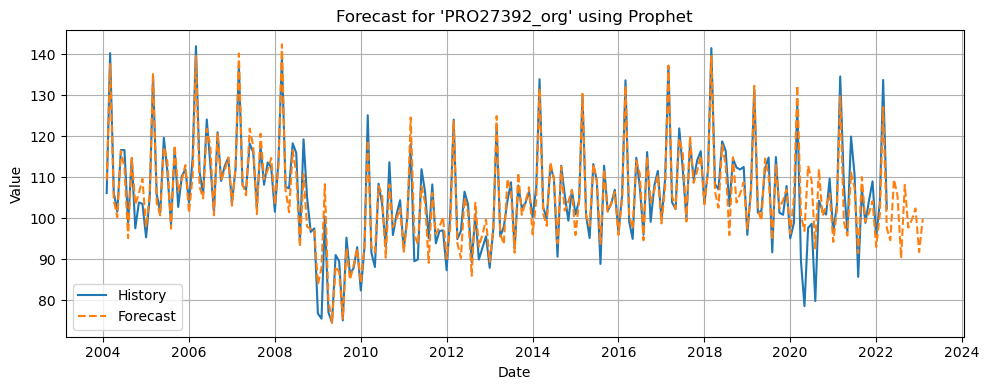

In [30]:
forcast = forecast_market_features_prophet(df_market, date_column='date', forecast_horizon=10, plot=True)

In [10]:
def append_forecasts_to_market_df(market_df, forecasts, date_column='date'):
    """
    Appends 10-month forecasts to market_df using forecast results per feature.

    Parameters:
        market_df (pd.DataFrame): Original market data.
        forecasts (dict): Dictionary of {feature: pd.Series or pd.DataFrame} with date index.
        date_column (str): Name of the datetime column in original market_df.

    Returns:
        pd.DataFrame: market_df extended with forecasted rows.
    """
    # Make sure the original date column is datetime and index is set
    df = market_df.copy()
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.set_index(date_column).asfreq("MS")

    # Create empty DataFrame for forecasts
    forecast_df = pd.DataFrame(index=next(iter(forecasts.values())).index)

    for feature, forecast_series in forecasts.items():
        if isinstance(forecast_series, pd.DataFrame):
            forecast_df[feature] = forecast_series['yhat']
        else:
            forecast_df[feature] = forecast_series

    # Combine original + forecasted data
    extended_df = pd.concat([df, forecast_df])
    extended_df = extended_df.reset_index().rename(columns={'index': date_column})

    return extended_df


In [11]:
extended_df = append_forecasts_to_market_df(df_market, forcast, date_column='date')
extended_df.tail(15)

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_SHP250,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_SHP826,MAB_ELE_SHP840,RohiBASEMET1000_org,RohiMETMIN1000_org,...,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRO28392_org,PRO271000_org,PRO27392_org
214,2021-12-01,310.763183,310.763183,134.589504,127.771735,131.029703,NaN,148.590371,125.207030,116.715183,...,126.761240,1.130400,128.511261,NaN,113.309631,108.182510,115.748863,136.975506,132.281006,109.005151
215,2022-01-01,235.956129,235.956129,108.156320,110.460181,110.823532,NaN,129.565798,133.219393,125.229641,...,129.829146,1.131400,131.628510,NaN,115.390617,111.037476,117.853386,117.861377,122.236023,95.369065
216,2022-02-01,235.956129,235.956129,117.715770,117.879631,118.300232,NaN,138.560330,138.905572,131.176501,...,131.963648,1.134200,133.342178,NaN,116.431107,112.057098,118.905647,124.710859,127.373421,103.950687
217,2022-03-01,329.413367,329.413367,136.858720,152.000561,156.400634,NaN,165.926217,149.890871,141.283339,...,135.782207,1.101900,136.153778,NaN,117.471596,112.362991,119.852684,160.954233,152.452942,133.743932
218,2022-04-01,267.373145,267.373145,116.528738,114.262328,115.012049,NaN,NaN,146.090998,138.094143,...,134.859685,1.081900,137.531616,NaN,118.408043,113.280655,121.220627,120.098810,134.843353,102.361680
219,2022-05-01,284.705297,284.705297,105.783405,107.958606,107.530472,NaN,136.772712,100.600381,98.401280,...,96.802956,1.146999,125.915029,NaN,111.597395,108.117098,115.855835,111.604032,130.727306,95.783604
220,2022-06-01,299.878775,299.878775,125.241499,123.708718,124.740160,NaN,144.676972,98.840850,96.808956,...,95.190336,1.143201,126.337162,NaN,111.798819,108.372185,115.977835,127.365894,137.632543,111.415315
221,2022-07-01,279.974458,279.974458,106.805138,119.394360,120.772606,NaN,129.835867,100.347752,98.269323,...,97.044873,1.145601,126.823371,NaN,111.903569,108.521878,116.162396,122.770765,134.512578,107.541354
222,2022-08-01,278.505055,278.505055,89.841885,108.230511,111.464787,NaN,137.544560,100.359171,98.225875,...,96.606247,1.148678,127.279585,NaN,112.087417,108.771546,116.284368,113.916976,127.843208,91.595261
223,2022-09-01,285.760873,285.760873,119.282690,126.895043,131.899270,NaN,141.327901,100.393016,97.677684,...,96.512637,1.145330,127.767022,NaN,112.160563,109.133166,116.429436,132.495120,141.394468,110.291495


In [23]:
nan_rows = extended_df[extended_df.isna().any(axis=1) & (extended_df['date'] > "2017-01-01")]
nan_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 201 to 228
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 28 non-null     datetime64[ns]
 1   MAB_ELE_PRO156       28 non-null     float64       
 2   MAB_ELE_SHP156       28 non-null     float64       
 3   MAB_ELE_SHP250       28 non-null     float64       
 4   MAB_ELE_PRO392       28 non-null     float64       
 5   MAB_ELE_SHP392       28 non-null     float64       
 6   MAB_ELE_SHP826       0 non-null      float64       
 7   MAB_ELE_SHP840       26 non-null     float64       
 8   RohiBASEMET1000_org  28 non-null     float64       
 9   RohiMETMIN1000_org   28 non-null     float64       
 10  RohiNATGAS1000_org   28 non-null     float64       
 11  RohCOPPER1000_org    28 non-null     float64       
 12  WKLWEUR840_org       28 non-null     float64       
 13  PRI27840_org         28 non-null     fl

# Product 1

In [13]:
# fit model on training data
model = XGBRegressor(random_state=1)
model.fit(lag_data5.iloc[:,:51], lag_data5.iloc[:,51])
# feature importance
importance_5=pd.DataFrame(index=lag_data5.iloc[:,:51].columns, data=model.feature_importances_)
importance_5.head()

NameError: name 'XGBRegressor' is not defined